In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/CCK8-Transfection_Plots/20231211_CCK8-Transfection_DIPLibrary_reducedserum.xlsx'
sheet_name = 'Sheet2'  
df = pd.read_excel(file_path, sheet_name=sheet_name)


In [3]:
polymers = df['Polymer']
transfection = df['Transfection']
trans_stdev = df['Stdev']
N_p_ratio = df['N/P Ratio']
viability = df['Viability']
viability_stdev = df['STD_Viability']

In [4]:
np_ratio_colors = {
    '0.0': '#082a54',   # N/P=0
    '1.0': '#a559aa',   # N/P = 1
    '5.0': '#59a89c',   # N/P = 5
    '7.5': '#f0c561', # N/P = 7.5
    '10.0': '#e02b35'   # N/P = 10
}

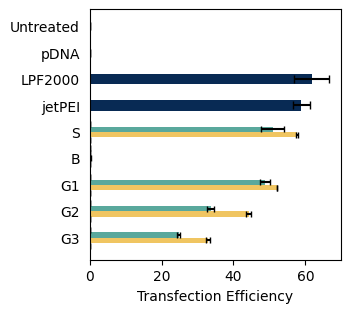

In [9]:
# Set the figure size
plt.figure(figsize=(3.25, 3.25))

# List of controls
controls = ['Untreated', 'pDNA','LPF2000', 'jetPEI']

# Separate controls from the rest of the DataFrame
controls_df = df[df['Polymer'].isin(controls)].drop_duplicates(subset='Polymer')
rest_df = df[~df['Polymer'].isin(controls)]

# Reset poly_index for the controls
poly_index = 0

# Plot controls once if they exist in the DataFrame
for control in controls:
    control_df = controls_df[controls_df['Polymer'] == control]
    if not control_df.empty:
        mean_value = control_df['Transfection'].values[0]
        std_dev = control_df['Stdev'].values[0]
        # Set the height of the control bar to 0.3
        plt.barh(poly_index, mean_value, color=np_ratio_colors[str(controls_df['N/P Ratio'].values[0])], height=0.4)  
        plt.errorbar(x=mean_value, y=poly_index, xerr=std_dev, fmt='none', c='black', capsize=3)
    poly_index += 1



# Loop through each polymer excluding controls to plot bars
for polymer in rest_df['Polymer'].unique():
    poly_df = rest_df[rest_df['Polymer'] == polymer]
    num_entries = len(poly_df['N/P Ratio'].unique())

    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P Ratio')):
        y = poly_index + (ratio_index - (num_entries - 1) / 2) * 0.2
        mean_value = group_df['Transfection'].mean()
        std_dev = group_df['Stdev'].mean()
        plt.barh(y, mean_value, color=np_ratio_colors[str(np_ratio)], height=0.2)  
        plt.errorbar(x=mean_value, y=y, xerr=std_dev, fmt='none', c='black', capsize=2)

    poly_index += 1

plt.gca().invert_yaxis()
plt.tick_params(left=False)
plt.xlim(0)
plt.xlabel('Transfection Efficiency')
custom_labels = controls + ['S', 'B', 'G1', 'G2', 'G3']
plt.yticks(ticks=range(len(custom_labels)), labels=custom_labels)

plt.show()


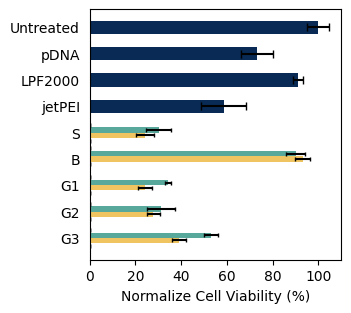

In [14]:
# Set the figure size
plt.figure(figsize=(3.25, 3.25))

# List of controls
controls = ['Untreated', 'pDNA','LPF2000', 'jetPEI']

# Separate controls from the rest of the DataFrame
controls_df = df[df['Polymer'].isin(controls)].drop_duplicates(subset='Polymer')
rest_df = df[~df['Polymer'].isin(controls)]

# Reset poly_index for the controls
poly_index = 0

# Plot controls once if they exist in the DataFrame
for control in controls:
    control_df = controls_df[controls_df['Polymer'] == control]
    if not control_df.empty:
        mean_value = control_df['Viability'].values[0]
        std_dev = control_df['STD_Viability'].values[0]
        # Set the height of the control bar to 0.3
        plt.barh(poly_index, mean_value, color=np_ratio_colors[str(controls_df['N/P Ratio'].values[0])], height=0.5)  
        plt.errorbar(x=mean_value, y=poly_index, xerr=std_dev, fmt='none', c='black', capsize=3)
    poly_index += 1



# Loop through each polymer excluding controls to plot bars
for polymer in rest_df['Polymer'].unique():
    poly_df = rest_df[rest_df['Polymer'] == polymer]
    num_entries = len(poly_df['N/P Ratio'].unique())

    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P Ratio')):
        y = poly_index + (ratio_index - (num_entries - 1) / 2) * 0.2
        mean_value = group_df['Viability'].mean()
        std_dev = group_df['STD_Viability'].mean()
        plt.barh(y, mean_value, color=np_ratio_colors[str(np_ratio)], height=0.2)  
        plt.errorbar(x=mean_value, y=y, xerr=std_dev, fmt='none', c='black', capsize=1.5)

    poly_index += 1

plt.gca().invert_yaxis()
plt.tick_params(left=False)
plt.xlim(0)
plt.xlabel('Normalize Cell Viability (%)')
custom_labels = controls + ['S', 'B', 'G1', 'G2', 'G3']
plt.yticks(ticks=range(len(custom_labels)), labels=custom_labels)

plt.show()
